# Ajneya Lal

## Research question/interests


Research Question : How do demographics, such as age and income, affect credit card churn rates?

This question aims to understand how demographic factors may influence customer churn in credit card services. By analysing the relationship between demographic variables and churn rates, we can gain insight into which customer segments are most at risk of churn.

Analysis plan: I will begin by dividing the dataset into different demographic segments, such as age groups or income brackets, and comparing churn rates between these groups. Then  use regression analysis to model the relationship between demographic variables and churn rates, controlling for other factors that may also influence churn.




In [117]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm

In [118]:
df = pd.read_csv('BankChurners.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


## Understanding my variables

In [119]:
df.shape

(10127, 23)

In [120]:
#The dataset has 10127 rows and 23 columns.

In [121]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [122]:
#We can see all the names of the columns in the dataset , there are a lot of columns some of which are not needed in my research.
#Therefore , I will be  remooving them in further steps.

In [123]:
df.nunique(axis=0)
#To see the number of unique values in my dataset for each variable.

CLIENTNUM                                                                                                                             10127
Attrition_Flag                                                                                                                            2
Customer_Age                                                                                                                             45
Gender                                                                                                                                    2
Dependent_count                                                                                                                           6
Education_Level                                                                                                                           7
Marital_Status                                                                                                                            4
Income_Category     

In [124]:
print(df.dtypes)
#Checking the datat types of each column

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [125]:
df.describe()
#A numerical summary of the variables in the dataset.

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


## Cleaning my Dataset

In [126]:
#The first step in cleaning my dataset is remvoing redundant variables.

In [127]:
newdf = df.drop(columns=['Avg_Open_To_Buy','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2','CLIENTNUM' ,'Total_Relationship_Count','Contacts_Count_12_mon','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1'])

In [128]:
newdf

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,1,12691.0,777,1.335,1144,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,1,8256.0,864,1.541,1291,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,1,3418.0,0,2.594,1887,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,4,3313.0,2517,1.405,1171,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,1,4716.0,0,2.175,816,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,2,4003.0,1851,0.703,15476,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,2,4277.0,2186,0.804,8764,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,3,5409.0,0,0.819,10291,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,3,5281.0,0,0.535,8395,0.000


In [129]:
#The second step in cleaning my dataset is remvoing null values
newdf_cleaned = newdf.dropna(axis=0)

In [130]:
newdf.shape

(10127, 15)

In [131]:
newdf_cleaned.shape

(10127, 15)

In [132]:
#The dataset does not contain any null values .Therefore , the shape of the dataset has not been changed.

In [133]:
newdf_cleaned = pd.get_dummies(newdf_cleaned, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], drop_first=True)
# Converting categorical variables into numerical values

In [134]:
print(newdf_cleaned.dtypes)
# Checking the data types of each column

Attrition_Flag                     object
Customer_Age                        int64
Dependent_count                     int64
Months_on_book                      int64
Months_Inactive_12_mon              int64
Credit_Limit                      float64
Total_Revolving_Bal                 int64
Total_Amt_Chng_Q4_Q1              float64
Total_Trans_Amt                     int64
Avg_Utilization_Ratio             float64
Gender_M                            uint8
Education_Level_Doctorate           uint8
Education_Level_Graduate            uint8
Education_Level_High School         uint8
Education_Level_Post-Graduate       uint8
Education_Level_Uneducated          uint8
Education_Level_Unknown             uint8
Marital_Status_Married              uint8
Marital_Status_Single               uint8
Marital_Status_Unknown              uint8
Income_Category_$40K - $60K         uint8
Income_Category_$60K - $80K         uint8
Income_Category_$80K - $120K        uint8
Income_Category_Less than $40K    

In [135]:
print(newdf_cleaned)

          Attrition_Flag  Customer_Age  Dependent_count  Months_on_book  \
0      Existing Customer            45                3              39   
1      Existing Customer            49                5              44   
2      Existing Customer            51                3              36   
3      Existing Customer            40                4              34   
4      Existing Customer            40                3              21   
...                  ...           ...              ...             ...   
10122  Existing Customer            50                2              40   
10123  Attrited Customer            41                2              25   
10124  Attrited Customer            44                1              36   
10125  Attrited Customer            30                2              36   
10126  Attrited Customer            43                2              25   

       Months_Inactive_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                           1  

## Analyzing relationships between variables

#### Exploring the distrubution of churn rates

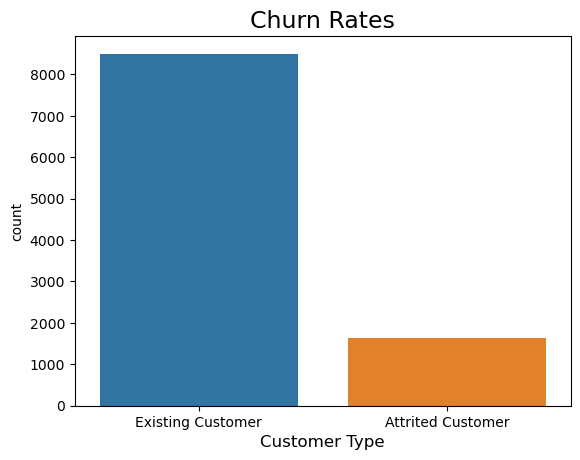

In [136]:
sns.countplot(x='Attrition_Flag', data=newdf_cleaned)
plt.title('Churn Rates',fontdict={'size': 17})
plt.xlabel('Customer Type', fontdict={'size': 12})
plt.show()

In [137]:
# From the graph above , it can be observed that the attrition flag value is significantly  higher for existing customers than attrited customers.Thus , this clearly shows that the dataset is imbalanced as the dataset has a much larger value for existing customers than churned customers.

#### Exploring the distrubution of age

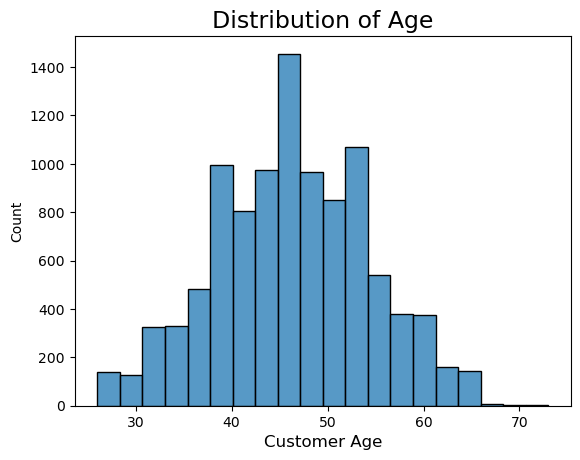

In [138]:
sns.histplot(x='Customer_Age', data=newdf_cleaned, bins=20)
plt.title('Distribution of Age',fontdict={'size': 17})
plt.xlabel('Customer Age', fontdict={'size': 12})
plt.show()

In [139]:
# From the graph above , it can be observed that the major percentage of customers are between the age range of appoximately 40 to 60 years old , with a few number of customers in the below 40 and above 60 years old age range. 
# The distribution of the histogram is roughly symmetric with a big peak between the 40 and 50 years old age range.

#### Exploring the relationship between age and churn rates

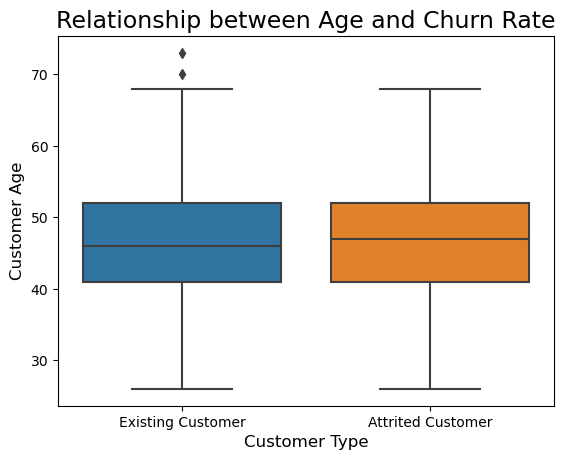

In [140]:
sns.boxplot(x='Attrition_Flag', y='Customer_Age', data=newdf_cleaned)
plt.title('Relationship between Age and Churn Rate',fontdict={'size': 17})
plt.xlabel('Customer Type', fontdict={'size': 12})
plt.ylabel('Customer Age', fontdict={'size': 12})
plt.show()

In [141]:
# From the graph above , it can be observed that the median age of customers who have churned is a little higher than the median age of customers who have not churned. We can aslo see that the existing customers group have more outliers than the attrited customer group.

#### Exploring the distribution of credit limit

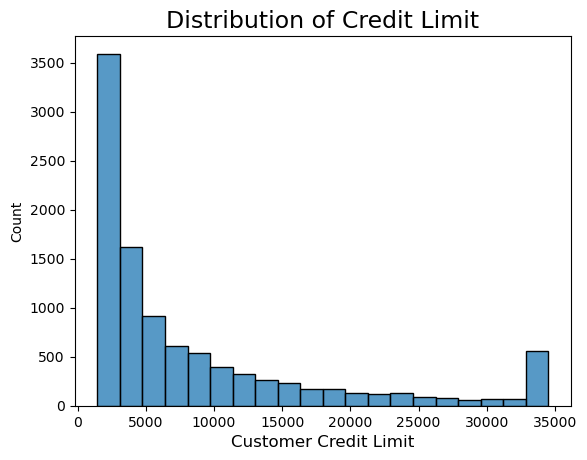

In [142]:
sns.histplot(x='Credit_Limit', data=newdf_cleaned, bins=20)
plt.title('Distribution of Credit Limit',fontdict={'size': 17})
plt.xlabel('Customer Credit Limit', fontdict={'size': 12})
plt.show()

In [143]:
# From the graph above , it can be observed that the majority of customers have a credit limit range of 0-20,000 with a big peak between the 0-5000 credit limit range.Along , with a few customers having a credit limit greater than 3000.
#The distribution of the graph is skewed to the right , which showcases that there are a less number of customers with a credit limit greater than 20,000 or with very high credit limits.

#### Exploring the relationship between income and churn rates

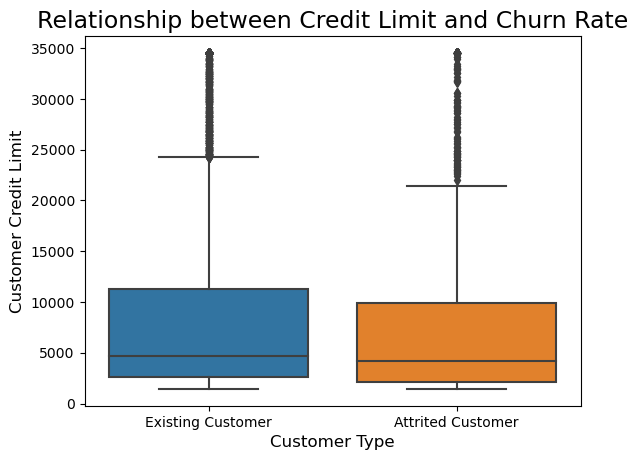

In [144]:
sns.boxplot(x='Attrition_Flag', y='Credit_Limit', data=newdf_cleaned)
plt.title('Relationship between Credit Limit and Churn Rate',fontdict={'size': 17})
plt.xlabel('Customer Type', fontdict={'size': 12})
plt.ylabel('Customer Credit Limit', fontdict={'size': 12})
plt.show()

In [145]:
# From the graph above , it can be observed that the median age of customers who have churned is a little higher than the median age of customers who have not churned. We can aslo see that the existing customers group have more outliers than the attrited customer group.

#### Exploring the distribution of gender

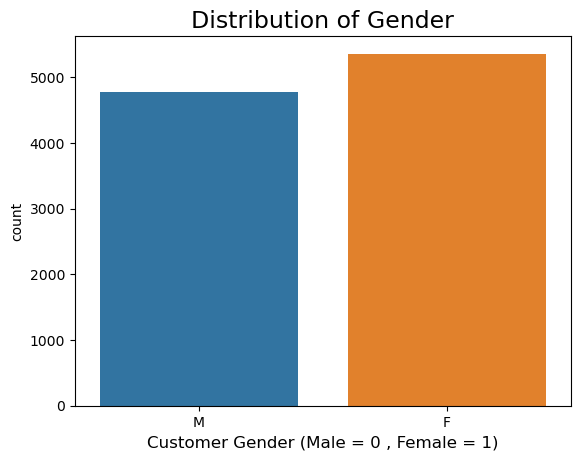

In [146]:
sns.countplot(x='Gender', data=newdf)
plt.title('Distribution of Gender',fontdict={'size': 17})
plt.xlabel('Customer Gender (Male = 0 , Female = 1)', fontdict={'size': 12})
plt.show()

In [147]:
# From the graph above , it can be observed that the dataset contains slightly higher number of female customers than male customers.

#### Exploring the relationship between gender and churn rates

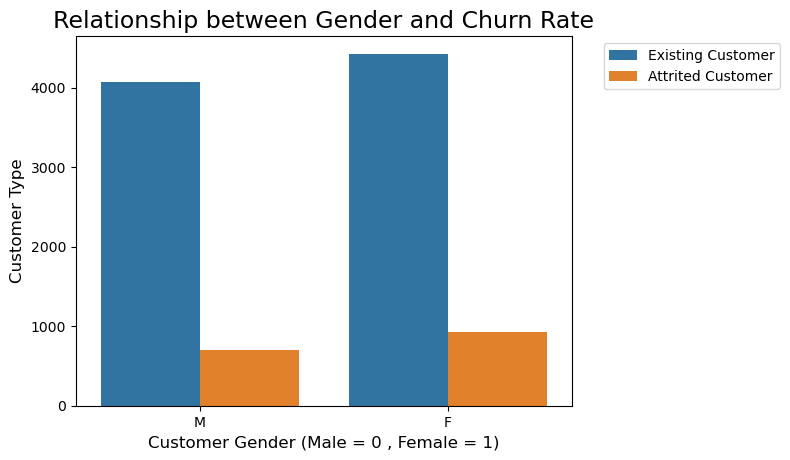

In [148]:
sns.countplot(x='Gender', hue='Attrition_Flag', data=newdf)
plt.title('Relationship between Gender and Churn Rate',fontdict={'size': 17})
plt.xlabel('Customer Gender (Male = 0 , Female = 1)', fontdict={'size': 12})
plt.ylabel('Customer Type', fontdict={'size': 12})
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [149]:
# From the graph above , it can be observed that the number of both attrited and exisiting customers is higher for female customers , however the datatset also contains higher number of female customers.Thus , further analysis is required for a concrete conclusion.

#### Exploring the distribution of education level

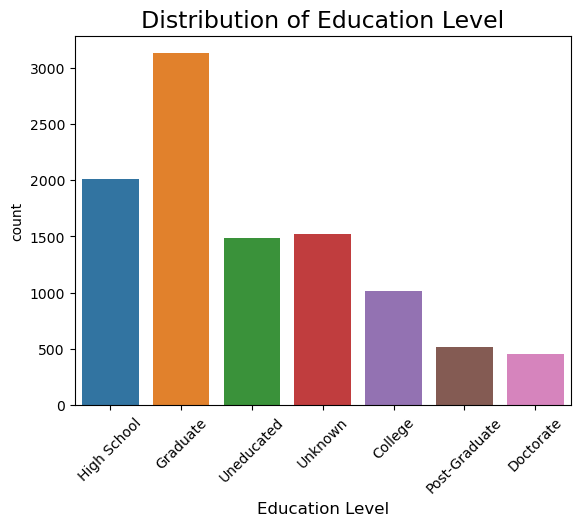

In [150]:
sns.countplot(x='Education_Level', data=newdf)
plt.title('Distribution of Education Level',fontdict={'size': 17})
plt.xlabel('Education Level', fontdict={'size': 12})
plt.xticks(rotation=45)
plt.show()

In [151]:
# From the graph above , it can be observed that majority number of customers have a Graduate education level and with a high school education level being the second highest.Also , we can see that the doctorate education level has the least number of customers.

#### Exploring the relationship between education level and churn rates

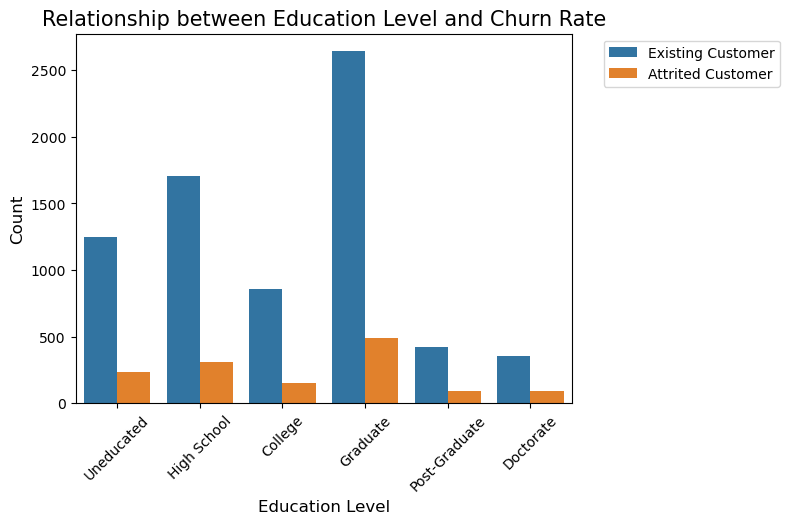

In [152]:
sns.countplot(x='Education_Level', hue='Attrition_Flag', data=newdf, order=['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate'])
plt.title('Relationship between Education Level and Churn Rate' , fontdict={'size': 15})
plt.xlabel('Education Level', fontdict={'size': 12})
plt.ylabel('Count', fontdict={'size': 12})
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [153]:
# From the graph above , it can be observed that the churn rates for graduate education level customers is the highest but it alsooo imporatant to remember that the number of graduate customers is also significantly higher.
# It can also be observed that the higher education levels have a lower churn rates but further analysis is required for a concrete conclusion.

#### Exploring the distribution of marital status

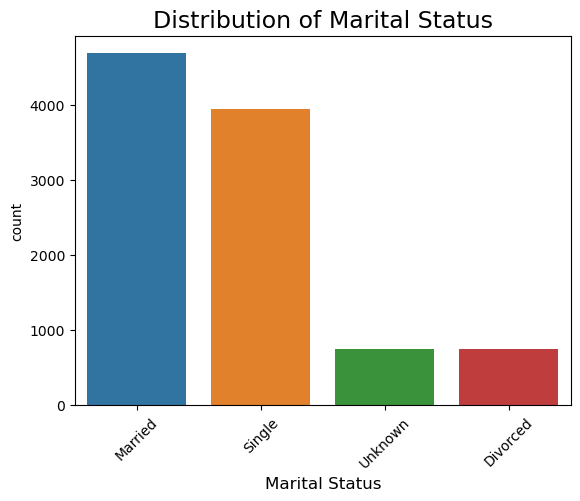

In [154]:
sns.countplot(x='Marital_Status', data=newdf)
plt.title('Distribution of Marital Status', fontdict={'size': 17})
plt.xlabel('Marital Status', fontdict={'size': 12})
plt.xticks(rotation=45)
plt.show()

In [155]:
# From the graph above , it can be observed that the majority of customers are married or single with number of married customers being slightly higher than single customers.

#### Exploring the relationship between marital status and churn rates

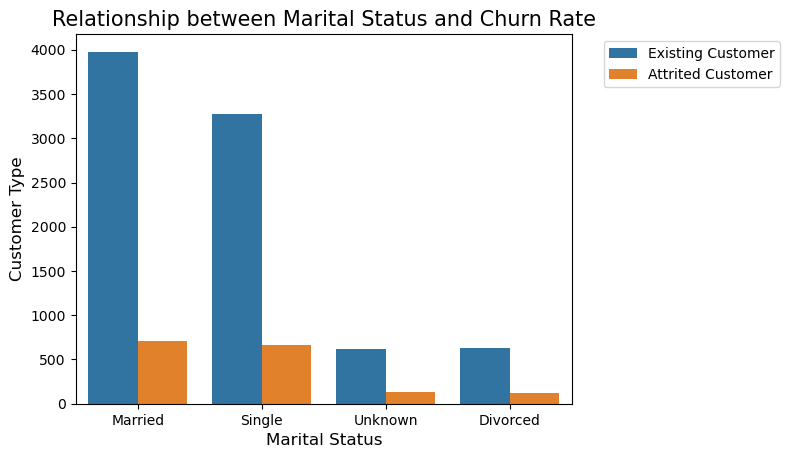

In [156]:
sns.countplot(x='Marital_Status', hue='Attrition_Flag', data=newdf)
plt.title('Relationship between Marital Status and Churn Rate', fontdict={'size': 15})
plt.xlabel('Marital Status', fontdict={'size': 12})
plt.ylabel('Customer Type', fontdict={'size': 12})
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [157]:
# From the graph above , it can be observed that the churn rate for married and single customers is the highest but it also important to consider that the number of married and single customers is also significantly higher.
# Therefore , further analysis is required for a concrete conclusion.

#### Exploring the distribution of income category

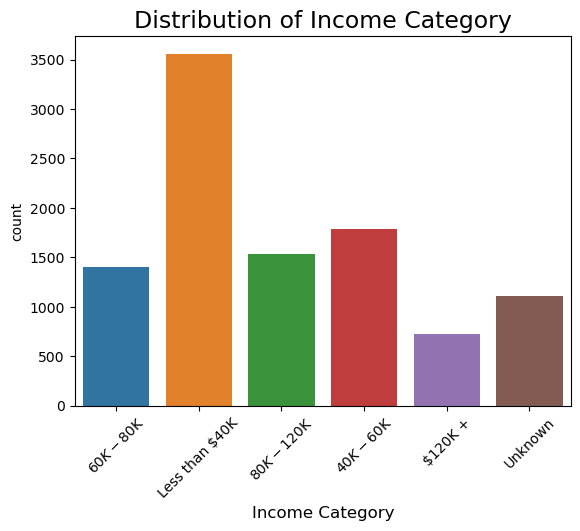

In [158]:
sns.countplot(x='Income_Category', data=newdf)
plt.title('Distribution of Income Category',fontdict={'size': 17})
plt.xlabel('Income Category', fontdict={'size': 12})
plt.xticks(rotation=45)
plt.show()

In [159]:
 # From the graph above , it can be observed that the majority of customers are in the income category less than $40k , therefore making the graph skewed to the left.

#### Exploring the relationship between income category and churn rates

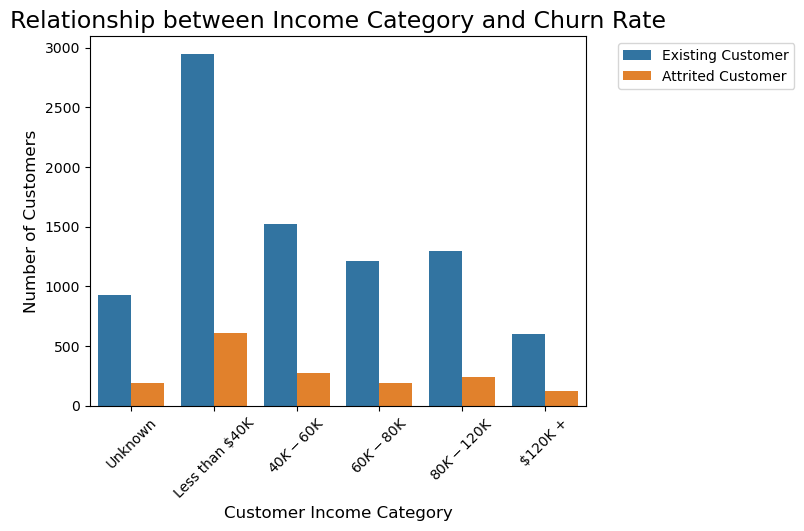

In [160]:
sns.countplot(x='Income_Category', hue='Attrition_Flag', data=newdf, order=['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +'])
plt.title('Relationship between Income Category and Churn Rate',fontdict={'size': 17})
plt.xlabel('Customer Income Category', fontdict={'size': 12})
plt.ylabel('Number of Customers', fontdict={'size': 12})
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [161]:
# From the graph above , it can be observed that the churn rates are the highest for customers in the less than $40k income category , but it also important to consider that the number of customers in the less than $40k income category is also significantly higher.
# Therefore , further analysis is required for a concrete conclusion.

#### Exploring the distribution of card category

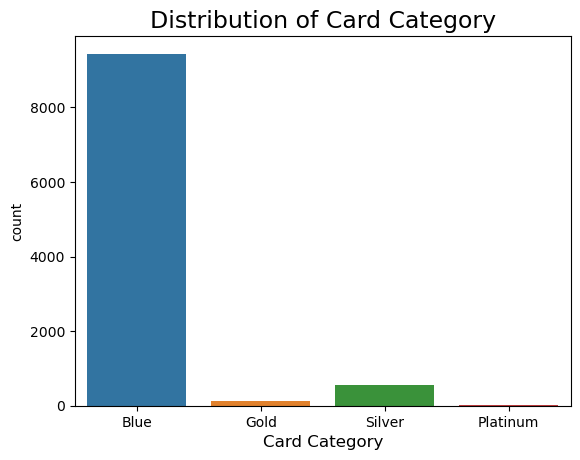

In [162]:
sns.countplot(x='Card_Category', data=newdf)
plt.title('Distribution of Card Category',fontdict={'size': 17})
plt.xlabel('Card Category', fontdict={'size': 12})
plt.show()

In [163]:
# From the graph above , it can be observed that the majority of customers are in the blue card category , therefore making the graph skewed to the left.

#### Exploring the relationship between card category and churn rates

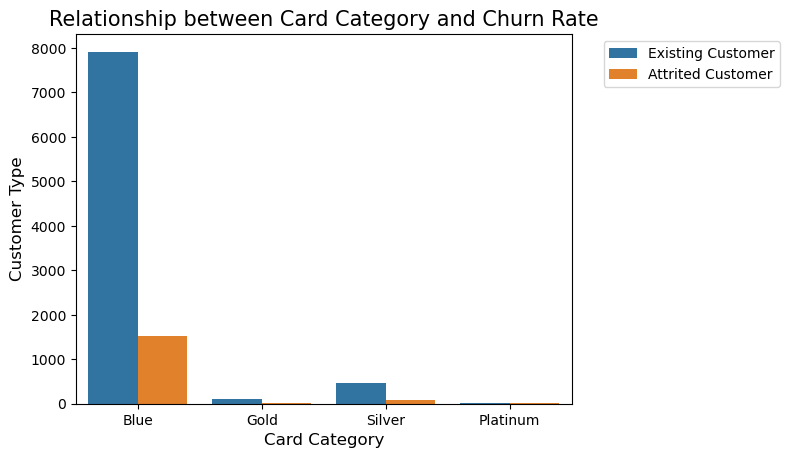

In [164]:
sns.countplot(x='Card_Category', hue='Attrition_Flag', data=newdf)
plt.title('Relationship between Card Category and Churn Rate', fontdict={'size': 15})
plt.xlabel('Card Category', fontdict={'size': 12})
plt.ylabel('Customer Type', fontdict={'size': 12})
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [165]:
# From the graph above , it can be observed that the churn rates are the highest for customers in the blue card category , but it also important to consider that the number of customers in the blue card category is also significantly higher.
# Therefore , further analysis is required for a concrete conclusion.

## Analysis

#### Correlation between customer age and churn rates

In [192]:
newdf

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Avg_Utilization_Ratio,churn,Churn,Attrition_Flag_Churned
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,1,12691.0,777,1.335,1144,0.061,0,0,0
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,1,8256.0,864,1.541,1291,0.105,0,0,0
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,1,3418.0,0,2.594,1887,0.000,0,0,0
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,4,3313.0,2517,1.405,1171,0.760,0,0,0
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,1,4716.0,0,2.175,816,0.000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,2,4003.0,1851,0.703,15476,0.462,0,0,0
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,2,4277.0,2186,0.804,8764,0.511,0,1,1
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,3,5409.0,0,0.819,10291,0.000,0,1,1
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,3,5281.0,0,0.535,8395,0.000,0,1,1


In [199]:
# I will firstly be analysisng the effect of customer age on churn rates.Below , i have firstly written code to calculate the churn rates for each customer age.
newdf['Churn'] = newdf['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
churn_rate_age = newdf.groupby('Customer_Age')['Churn'].mean().reset_index()

##### Lineplot for correlation between customer age and churn rates

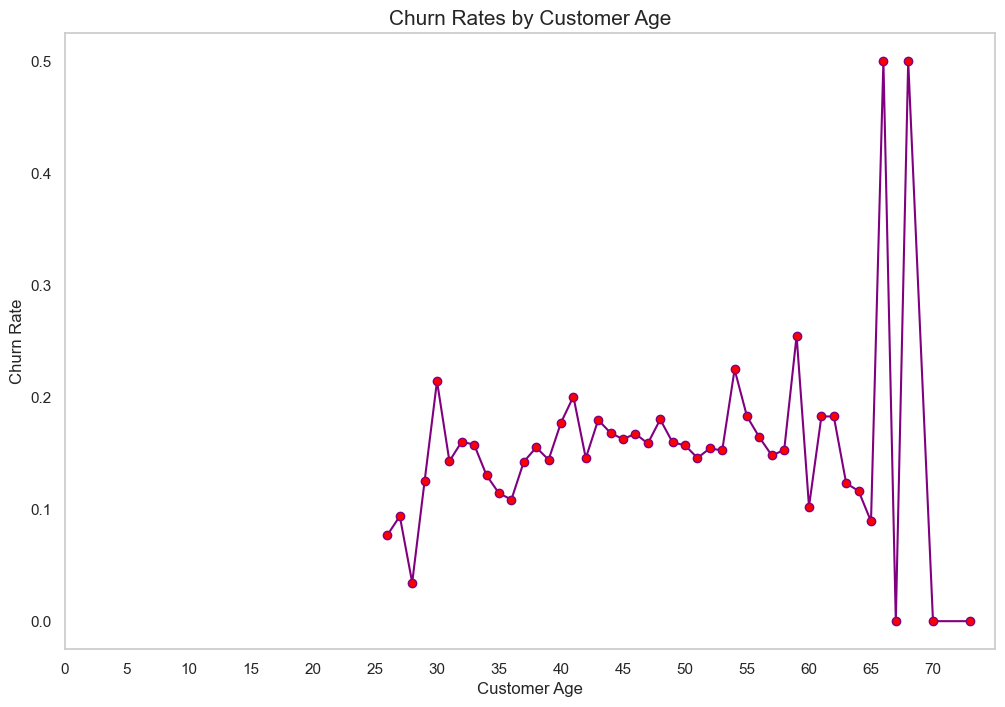

In [206]:
plt.figure(figsize=(12, 8))
plt.plot(churn_rates['Customer_Age'], churn_rates['Churn'], color='purple', marker='o', markerfacecolor='red')
plt.grid()
plt.xlim(0, 75)
interval = 5 
plt.xticks(range(0, 75, interval))
plt.title('Churn Rates by Customer Age', fontdict={'size': 15})
plt.xlabel('Customer Age', fontdict={'size': 12})
plt.ylabel('Churn Rate', fontdict={'size': 12})
plt.show()

In [254]:
# From the graph above , it can be observed that the churn rates are the highest bewteen the 65 to 70 years age group.However , from previous parts we know that the major percentage of customers are between the age range of appoximately 40 to 60 years old.
#Thus , in the next steps we will calculte the churn rate based on the ratio of each age group.

##### Barplot for correlation between customer age and churn rates

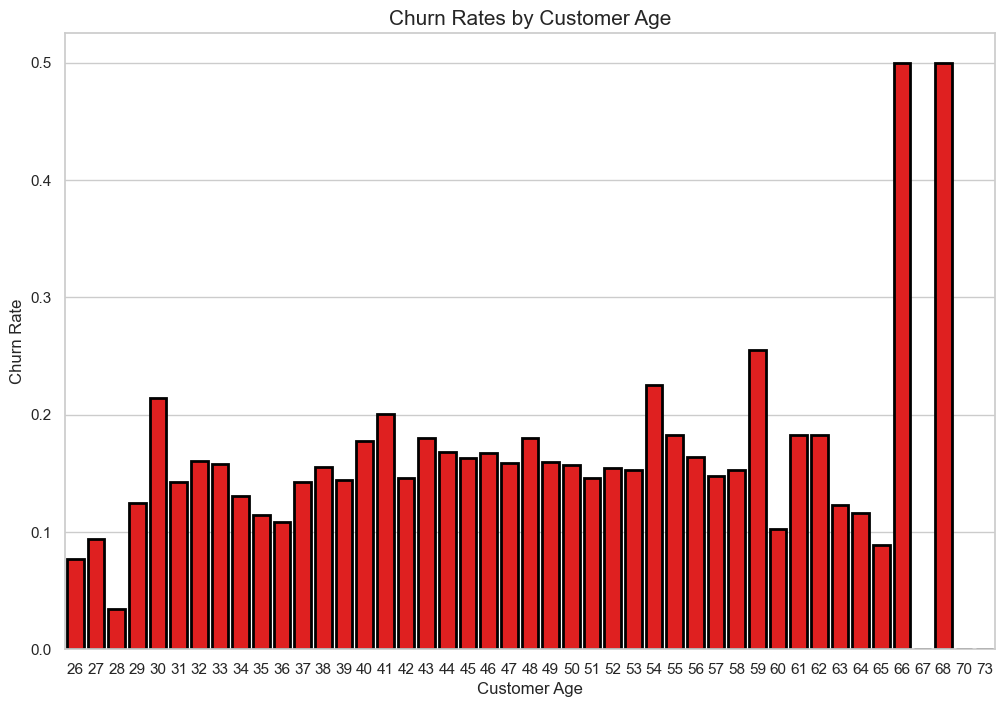

In [285]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Customer_Age', y='Churn', data=churn_rate_age, color='red', edgecolor='black', linewidth=2)
plt.title('Churn Rates by Customer Age', fontdict={'size': 15})
plt.xlabel('Customer Age', fontdict={'size': 12})
plt.ylabel('Churn Rate', fontdict={'size': 12})
plt.show()


In [235]:
# From the graph above , it can be observed that the churn rates are significantly highest for the 66 and 68 years age groups.

##### Linear regression for correlation between customer age and churn rates

In [221]:
# Performing regression analysis to model the relationship between demographic variables and churn rates
X = sm.add_constant(newdf['Customer_Age'])
y = newdf['churn']
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.065623
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                10127
Model:                          Logit   Df Residuals:                    10125
Method:                           MLE   Df Model:                            1
Date:                Wed, 29 Mar 2023   Pseudo R-squ.:                0.006883
Time:                        02:49:13   Log-Likelihood:                -664.56
converged:                       True   LL-Null:                       -669.17
Covariance Type:            nonrobust   LLR p-value:                  0.002404
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -6.0221      0.560    -10.760      0.000      -7.119      -4.925
Customer_Age     0.0344

In [222]:
#From the table above , it can be observed thatthere is a statistically significant relationship between customer age and churn rates as the p-value is less than 0.05. From the coefficient of age indicates that an one year increase in age , decreases the odds of churn rates by 0.0344.However , from the graph above
#we know this is not true between the age range 65-70.Overall , there is a significant realptionship between customer age and churn rates but there are other important factors too as the r-squared value is only of 0.0068.

#### Correlation between gender and churn rate

In [241]:
newdf['Attrition_Flag_Churned'] = newdf['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

In [242]:
newdf

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Avg_Utilization_Ratio,churn,Churn,Attrition_Flag_Churned
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,1,12691.0,777,1.335,1144,0.061,0,0,0
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,1,8256.0,864,1.541,1291,0.105,0,0,0
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,1,3418.0,0,2.594,1887,0.000,0,0,0
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,4,3313.0,2517,1.405,1171,0.760,0,0,0
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,1,4716.0,0,2.175,816,0.000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,2,4003.0,1851,0.703,15476,0.462,0,0,0
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,2,4277.0,2186,0.804,8764,0.511,0,1,1
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,3,5409.0,0,0.819,10291,0.000,0,1,1
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,3,5281.0,0,0.535,8395,0.000,0,1,1


In [243]:
#Calculating the churn rate for each gender
churn_rates_gen = newdf.groupby('Gender')['Attrition_Flag_Churned'].mean().reset_index(name='Churn_Rate')

In [244]:
churn_rates_gen

,Gender,Churn_Rate
0,F,0.173572
1,M,0.146152


##### Barplot for correlation between gender and churn rate

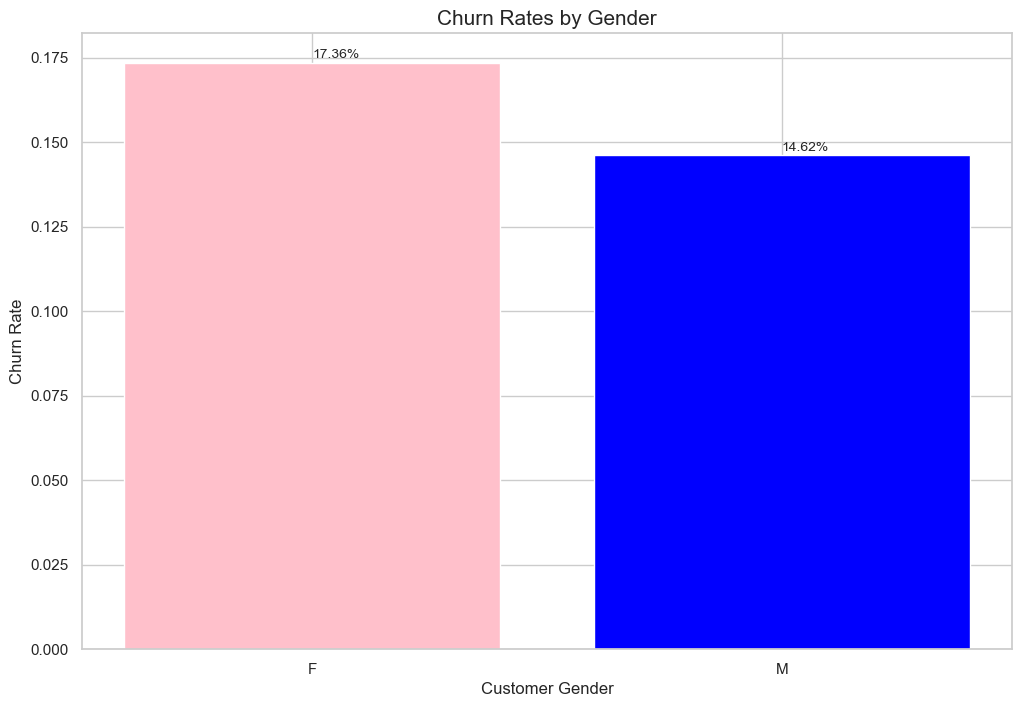

In [245]:
fig, ax = plt.subplots(figsize=(12, 8))
colors = ['pink', 'blue']

bars = ax.bar(churn_rates_gen['Gender'], churn_rates_gen['Churn_Rate'],color=colors)
ax.grid(axis='y', linestyle='-')

for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.2f}%'.format(height*100), xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),textcoords="offset points", fontsize=10)
    
ax.set_title('Churn Rates by Gender', fontsize=15)    
ax.set_xlabel('Customer Gender', fontsize=12)
ax.set_ylabel('Churn Rate', fontsize=12)
plt.show()

In [246]:
# From the graph above , it can be observed that Females have higher churn rates than males , but since we know that the dataset includes more female values.Thus , in the next steps we will calculte the churn rate based on the ratio of each gender.

##### Barplot for correlation between the ratio of gender and churn rate

In [250]:
#Code to count the each gender value and calculate the churn rate based on ratio of each gender.
gender_count = newdf['Gender'].value_counts()
churn_rates_gen['Churn_Rate_Ratio'] = churn_rates_gen['Churn_Rate'] / gender_count[churn_rates_gen['Gender']].values

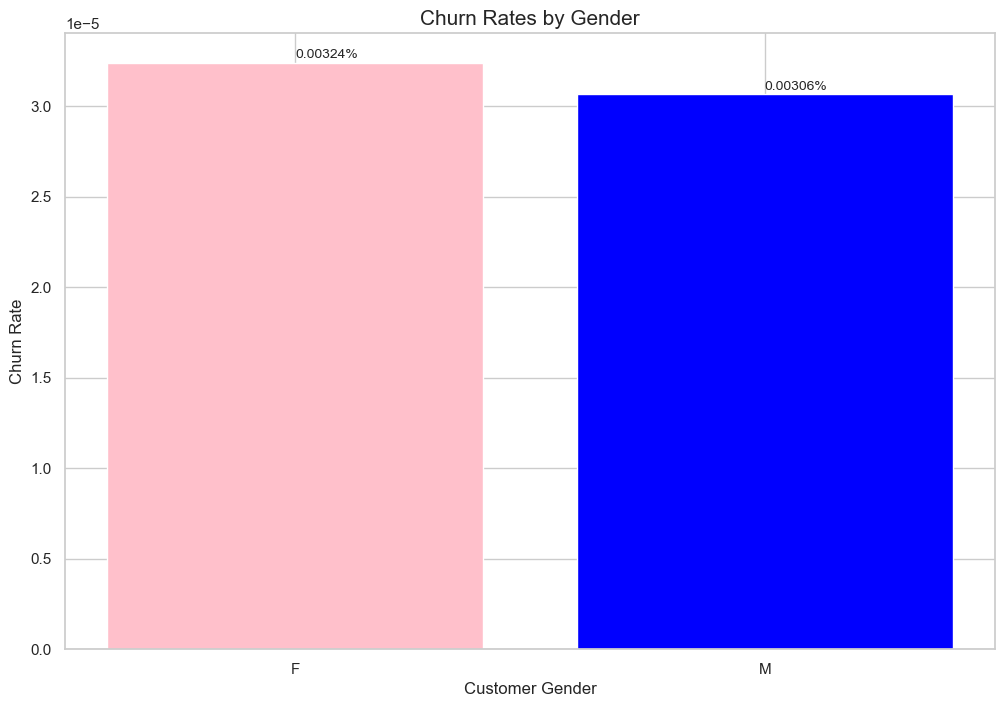

In [253]:
fig, ax = plt.subplots(figsize=(12, 8))
colors = ['pink', 'blue']

bars = ax.bar(churn_rates_gen['Gender'], churn_rates_gen['Churn_Rate_Ratio'],color=colors)
ax.grid(axis='y', linestyle='-')

for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.5f}%'.format(height*100), xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),textcoords="offset points", fontsize=10)
    
ax.set_title('Churn Rates by Gender', fontsize=15)    
ax.set_xlabel('Customer Gender', fontsize=12)
ax.set_ylabel('Churn Rate', fontsize=12)
plt.show()

In [202]:
# From the graph above , it can be observed that females still hvae higher churn rates than males based on ratio. Therefore , we can conlude that females do in fact have higher churn rates then men.

#### Correlation between education level and churn rate

In [203]:
newdf['Attrition_Flag_Churned'] = newdf['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

In [286]:
newdf

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Avg_Utilization_Ratio,churn,Churn,Attrition_Flag_Churned
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,1,12691.0,777,1.335,1144,0.061,0,0,0
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,1,8256.0,864,1.541,1291,0.105,0,0,0
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,1,3418.0,0,2.594,1887,0.000,0,0,0
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,4,3313.0,2517,1.405,1171,0.760,0,0,0
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,1,4716.0,0,2.175,816,0.000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,2,4003.0,1851,0.703,15476,0.462,0,0,0
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,2,4277.0,2186,0.804,8764,0.511,0,1,1
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,3,5409.0,0,0.819,10291,0.000,0,1,1
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,3,5281.0,0,0.535,8395,0.000,0,1,1


In [311]:
#Calculating the churn rate for each education level
churn_rates_ed = newdf.groupby('Education_Level')['Attrition_Flag_Churned'].mean().reset_index(name='Churn_Rate')

In [312]:
churn_rates_ed

,Education_Level,Churn_Rate
0,College,0.152024
1,Doctorate,0.210643
2,Graduate,0.155691
3,High School,0.152012
4,Post-Graduate,0.178295
5,Uneducated,0.159381
6,Unknown,0.168532


##### Barplot for correlation between education level and churn rate

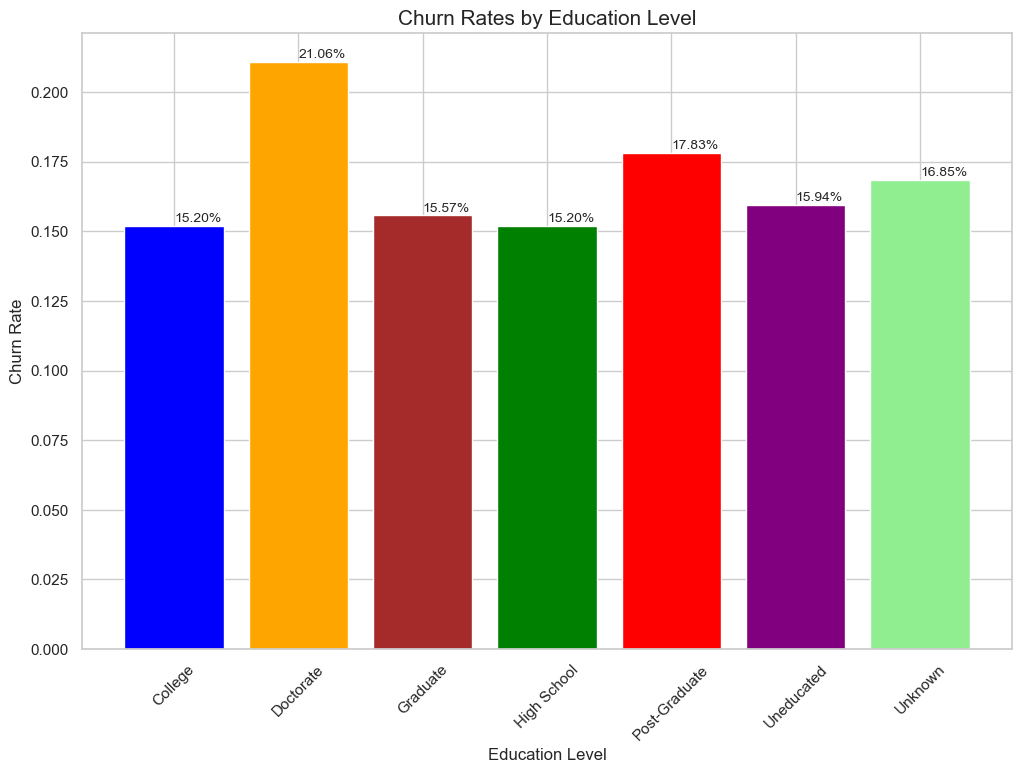

In [313]:
fig, ax = plt.subplots(figsize=(12, 8))
colors = ['blue', 'orange', 'brown', 'green', 'red', 'purple', 'lightgreen']

bars = ax.bar(churn_rates_ed['Education_Level'], churn_rates_ed['Churn_Rate'],color=colors)
ax.grid(axis='y', linestyle='-')

for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.2f}%'.format(height*100), xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),textcoords="offset points", fontsize=10)
    
ax.set_title('Churn Rates by Education Level', fontsize=15)    
ax.set_xlabel('Education Level', fontsize=12)
ax.set_ylabel('Churn Rate', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [314]:
# From the graph above , it can be observed that the doctorate education level has a Significantly higher churn rate than then the rest of the education levels.However , from previous parts of this research we also know that the number of customers in the graduate education is higher than the rest.
#Therefore,in the next stpes we will calculate the churn rates based on the ratio of each education level

In [315]:
#Code to count the each customer in the education levels and calculate the churn rate based on ratio of education level.
customer_counts = newdf['Education_Level'].value_counts()
churn_rates_ed['Churn_Rate_Ratio'] = churn_rates_ed['Churn_Rate'] / customer_counts[churn_rates_ed['Education_Level']].values

##### Barplot for correlation between ratio of education level and churn rate

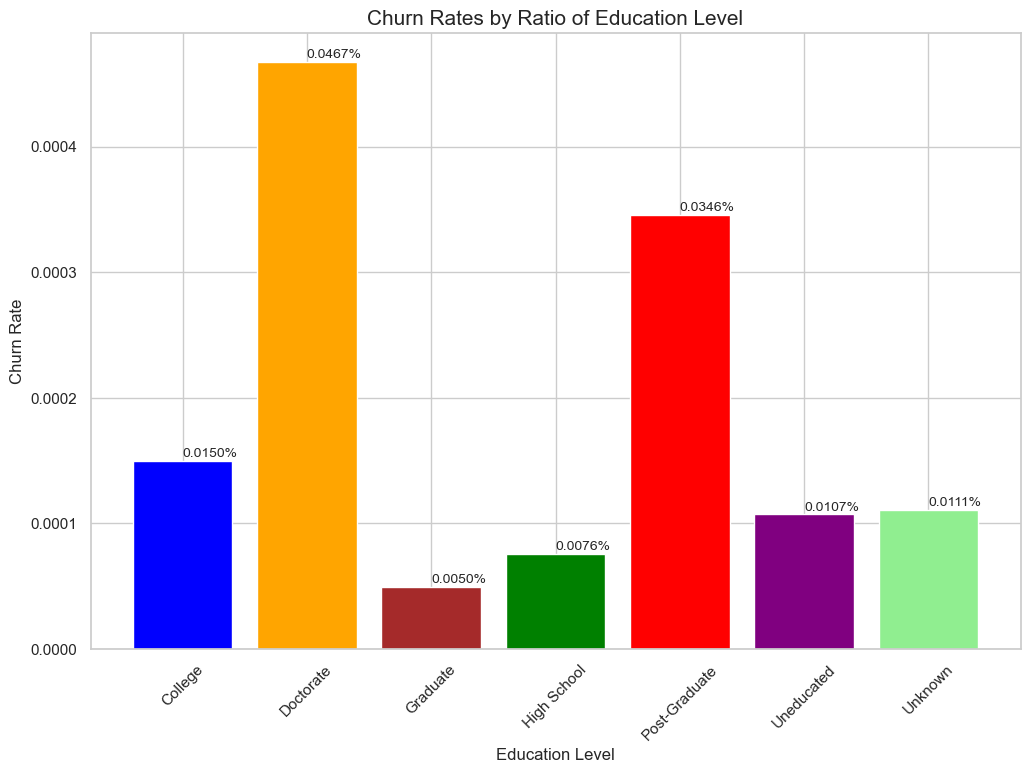

In [316]:
fig, ax = plt.subplots(figsize=(12, 8))
colors = ['blue', 'orange', 'brown', 'green', 'red', 'purple', 'lightgreen']

bars = ax.bar(churn_rates_ed['Education_Level'], churn_rates_ed['Churn_Rate_Ratio'],color=colors)
ax.grid(axis='y', linestyle='-')

for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.4f}%'.format(height*100), xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),textcoords="offset points", fontsize=10)
    
ax.set_title('Churn Rates by Ratio of Education Level', fontsize=15)    
ax.set_xlabel('Education Level', fontsize=12)
ax.set_ylabel('Churn Rate', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [317]:
# From the graph above , it can be observed that the doctorate education level still has a Significantly higher ratio churn rate than then the rest of the education levels.Therefore , I can conclude that the doctorate education level has the highest churn rates. 
# I can also notice that post-graduate education level has the second-highest churn rate.Thus , as the education level increases the chances of churring also increases.

##### Linear regression for correlation between education level and churn rate

#### Correlation between martial staus and churn rate

In [326]:
#Calculating the churn rate for each marital status
churn_rates_ms = newdf.groupby('Marital_Status')['Attrition_Flag_Churned'].mean().reset_index(name='Churn_Rate')

In [327]:
churn_rates_ms

,Marital_Status,Churn_Rate
0,Divorced,0.161765
1,Married,0.151269
2,Single,0.169414
3,Unknown,0.172230


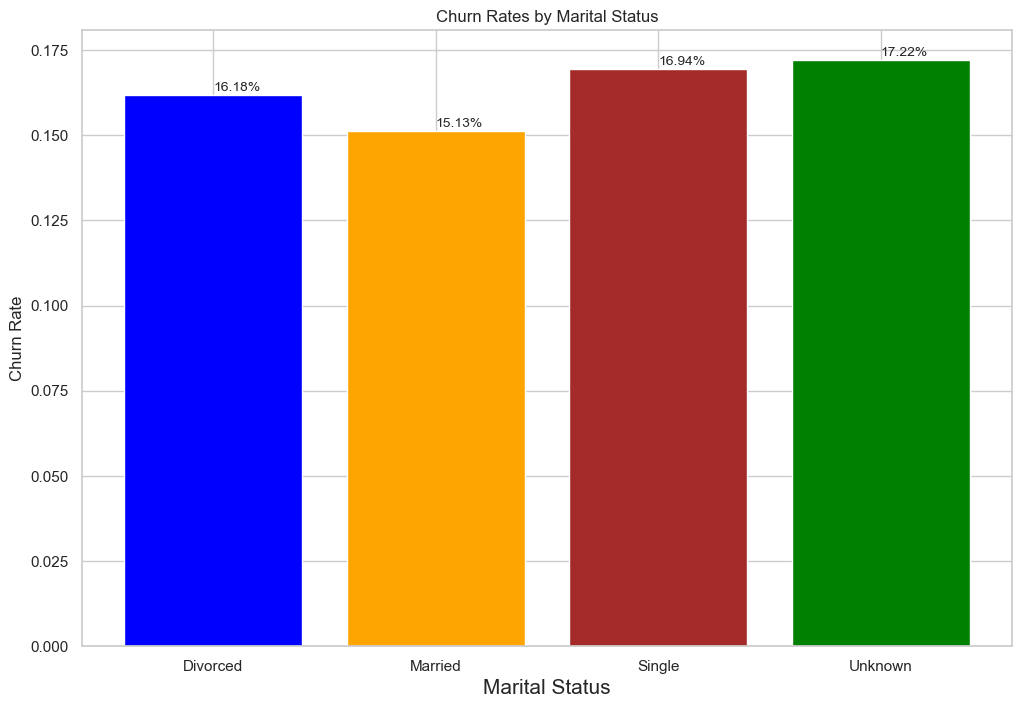

In [345]:
fig, ax = plt.subplots(figsize=(12, 8))

colors = ['blue', 'orange', 'brown', 'green',]

bars = ax.bar(churn_rates_ms['Marital_Status'], churn_rates_ms['Churn_Rate'], color=colors)
ax.grid(axis='y', linestyle='-')

for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.2f}%'.format(height*100), xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),textcoords="offset points", fontsize=10)
    
plt.xlabel('Marital Status', fontsize=15)
plt.ylabel('Churn Rate', fontsize=12)
plt.title('Churn Rates by Marital Status', fontsize=12)
plt.show()

In [344]:
# From the graph above , it can be observed that the unknown and single marital status have a significantly higher churn rate than then the rest of the marital status.However , from previous parts of this research we also know that the number of customers in the divorced and married marital status is higher than the rest.
#Therefore,in the next stpes we will calculate the churn rates based on the ratio of each marital status.

In [351]:
#Code to count the number of customers in each marital status and calculate the churn rate based on ratio of marital status.
total_customers_ms = newdf['Marital_Status'].value_counts()
attrited_customers_ms = newdf[newdf['Attrition_Flag'] == 'Attrited Customer']['Marital_Status'].value_counts()
newchurn_rate_ms = (attrited_customers_ms / total_customers_ms.sum()).sort_index()



In [358]:
newchurn_rate_ms

Divorced    0.011948
Married     0.070011
Single      0.065962
Unknown     0.012738
Name: Marital_Status, dtype: float64

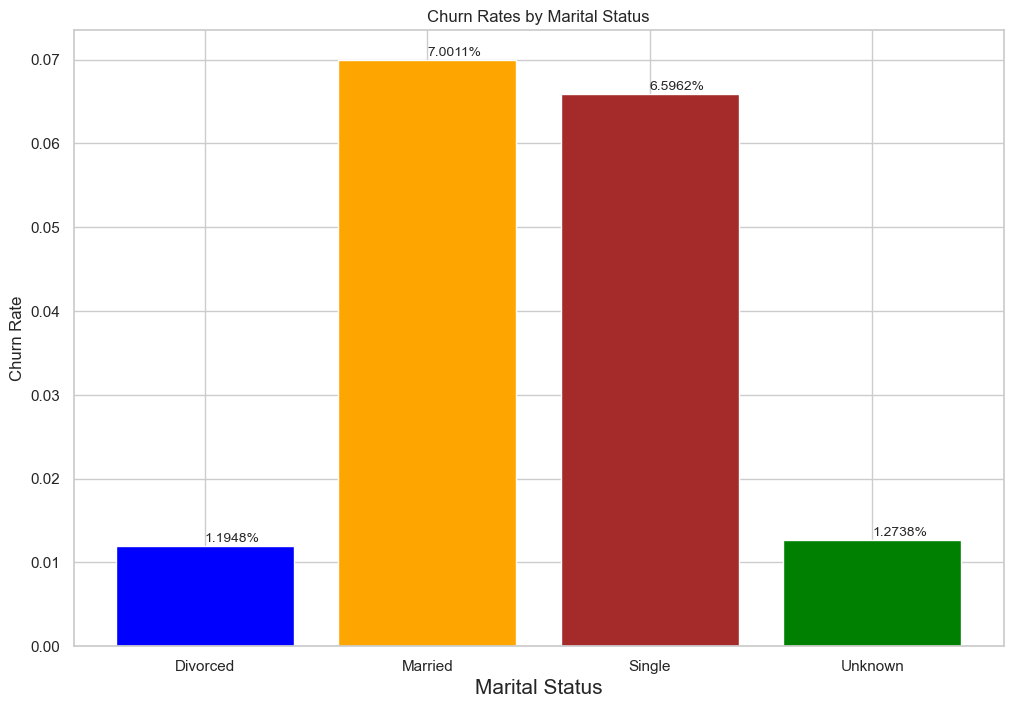

In [365]:
fig, ax = plt.subplots(figsize=(12, 8))
colors = ['blue', 'orange', 'brown', 'green']
bars = ax.bar(churn_rate_ms.index, churn_rate_ms.values, color=colors)
ax.grid(axis='y', linestyle='-')

for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.4f}%'.format(height*100), xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),textcoords="offset points", fontsize=10)

plt.xlabel('Marital Status', fontsize=15)
plt.ylabel('Churn Rate', fontsize=12)
plt.title('Churn Rates by Marital Status', fontsize=12)
plt.show()

##### Linear regression for correlation between marital status and churn rate

In [ ]:
# From the graph above , it can be observed that based on the ratio of each marital status the married marital status has the highest churn rate ratio with the single marital status being the second highest.Further analysis is required to see if marital status has a significant effect on churn rates.

#### Correlation between income category and churn rate

In [395]:
#Calculating the churn rate for each income category
churn_rates_in = newdf.groupby('Income_Category')['Attrition_Flag_Churned'].mean().reset_index(name='Churn_Rate')

In [367]:
churn_rates_in

,Income_Category,Churn_Rate
0,$120K +,0.173315
1,$40K - $60K,0.151397
2,$60K - $80K,0.134807
3,$80K - $120K,0.157655
4,Less than $40K,0.171862
5,Unknown,0.168165


##### Barplot for correlation between income category and churn rate

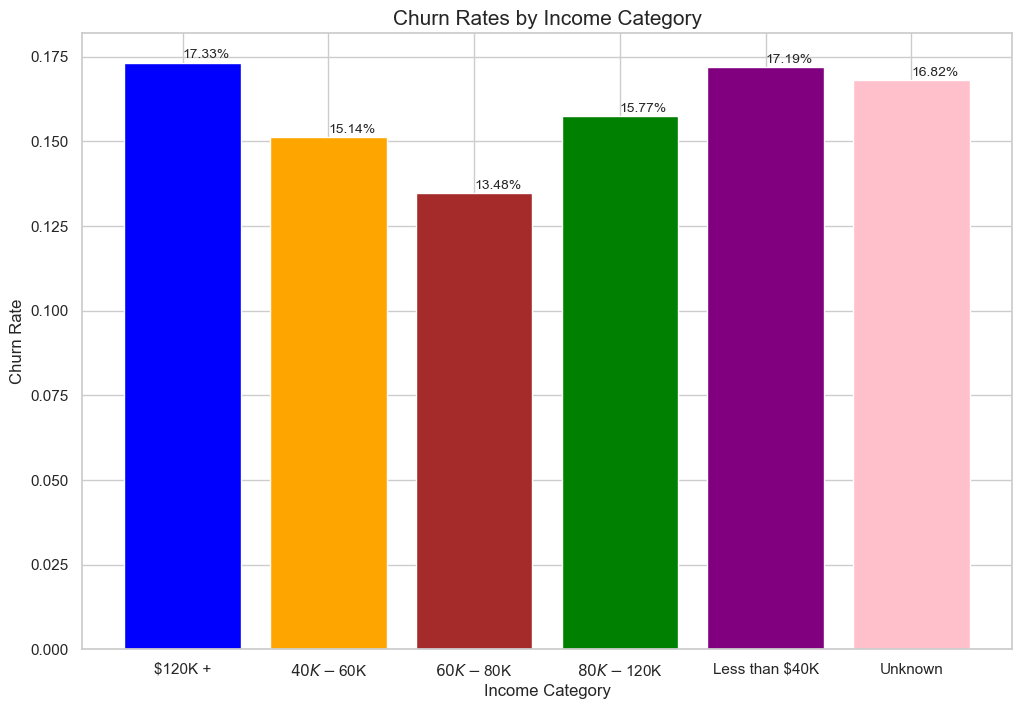

In [389]:
fig, ax = plt.subplots(figsize=(12, 8))

colors = ['blue', 'orange', 'brown', 'green','purple' ,'pink']

bars = ax.bar(churn_rates_in['Income_Category'], churn_rates_in['Churn_Rate'], color=colors)
ax.grid(axis='y', linestyle='-')

for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.2f}%'.format(height*100), xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),textcoords="offset points", fontsize=10)
    
plt.xlabel('Income Category', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.title('Churn Rates by Income Category', fontsize=15)
plt.show()

In [240]:
# From the graph above , it can be observed that the churn rates are the highest for customers in the less than $40k category and $120+ category as the difference is almost insignificant between both. However ,  from previous parts of the research we know that the majority of customers are in the less than $40k category.
#Therefore,in the next stpes we will calculate the churn rates based on the ratio of each income category.

In [388]:
#Code to count the number of customers in each income category and calculate the churn rate based on ratio of each income category
total_customers_in = newdf['Income_Category'].value_counts()
total_customers = total_customers_in.sum()
attrited_customers_in = newdf[newdf['Attrition_Flag'] == 'Attrited Customer']['Income_Category'].value_counts()
ratio_customers_in = total_customers_in / total_customers
churn_rate_in = (attrited_customers_in / total_customers_in.sum()).sort_index()
churn_rate_ratio_in = (attrited_customers_in / total_customers_in * ratio_customers_in).sort_index()

In [387]:
churn_rate_ratio_in

$120K +           0.012442
$40K - $60K       0.026760
$60K - $80K       0.018663
$80K - $120K      0.023897
Less than $40K    0.060433
Unknown           0.018465
Name: Income_Category, dtype: float64

##### Barplot for correlation between ratio of income category and churn rate

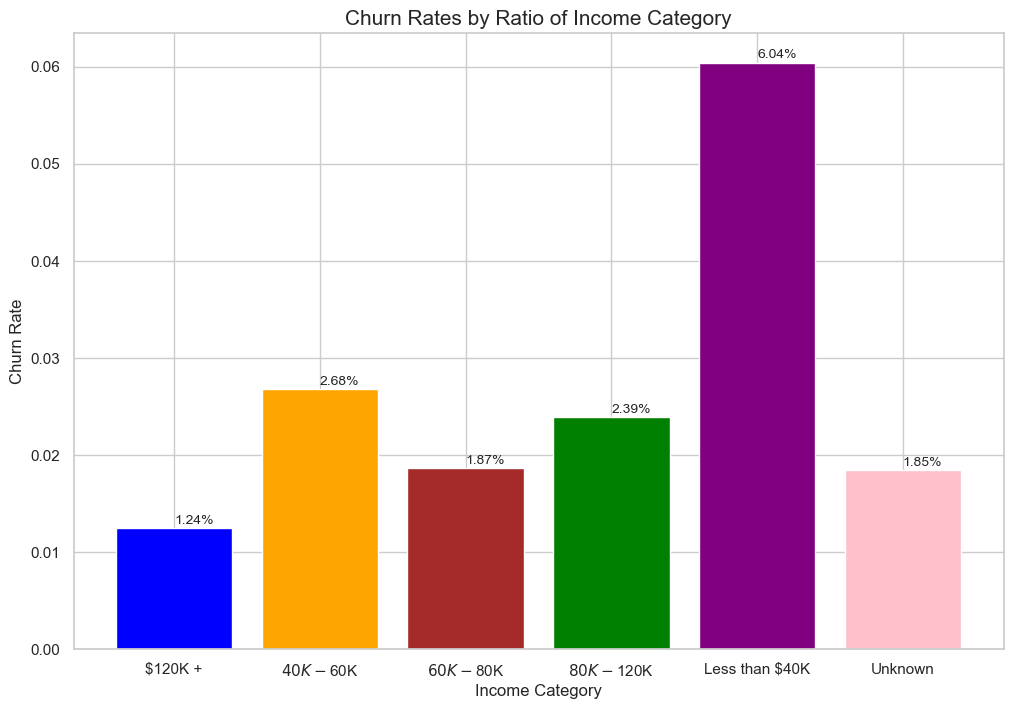

In [415]:
fig, ax = plt.subplots(figsize=(12, 8))

colors = ['blue', 'orange', 'brown', 'green', 'purple', 'pink']

bars = ax.bar(churn_rate_ratio_in.index, churn_rate_ratio_in.values, color=colors)
ax.grid(axis='y', linestyle='-')


for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.2f}%'.format(height*100), xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),textcoords="offset points", fontsize=10)
    
plt.xlabel('Income Category', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.title('Churn Rates by Ratio of Income Category', fontsize=15)
plt.show()

In [ ]:
# From the graph above , it can be observed that the ratio churn rates are the highest for customers in the less than $40k category.Therefore , we can conclude that the churn rate is the highest for customers in the less than $40k income category.

##### Linear regression for correlation between income category and churn rate

#### Correlation between card category and churn rate

In [398]:
#Calculating the churn rate for each card category
churn_rates_cd = newdf.groupby('Card_Category')['Attrition_Flag_Churned'].mean().reset_index(name='Churn_Rate')

In [397]:
churn_rates_cd

,Card_Category,Churn_Rate
0,Blue,0.160979
1,Gold,0.181034
2,Platinum,0.250000
3,Silver,0.147748


##### Barplot for correlation between card category and churn rate

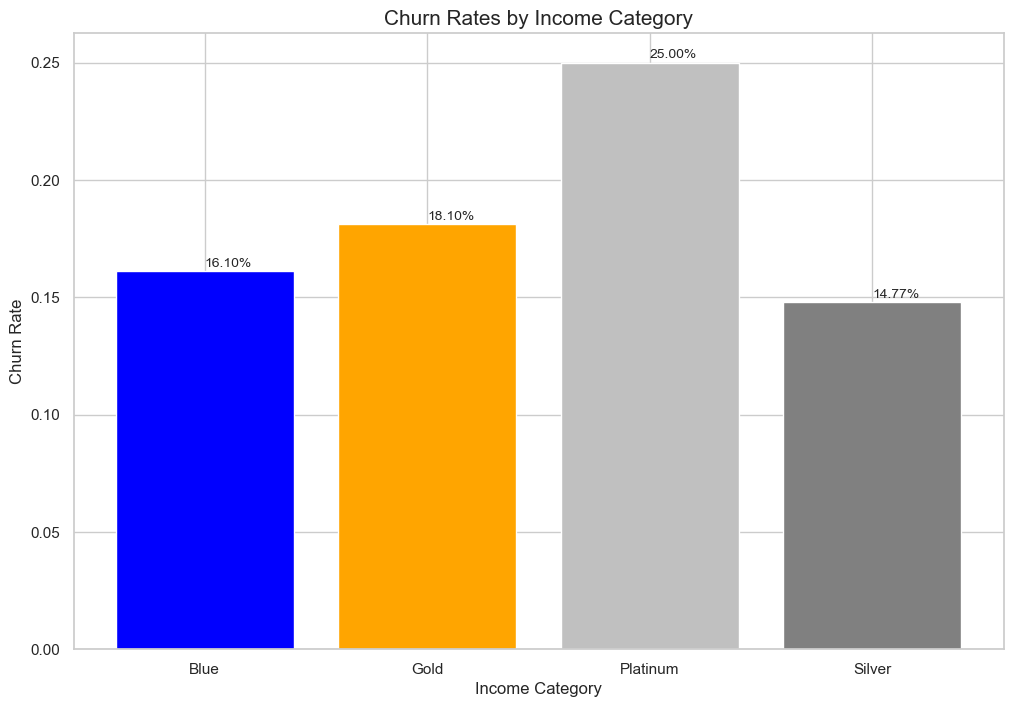

In [422]:
fig, ax = plt.subplots(figsize=(12, 8))

colors = ['blue', 'orange', 'silver', 'grey']

bars = ax.bar(churn_rates_cd['Card_Category'], churn_rates_cd['Churn_Rate'], color=colors)
ax.grid(axis='y', linestyle='-')

for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.2f}%'.format(height*100), xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),textcoords="offset points", fontsize=10)
    
plt.xlabel('Income Category', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.title('Churn Rates by Income Category', fontsize=15)
plt.show()

In [402]:
# From the graph above , it can be observed that the churn rates are the highest for customers in the Platinum card category. However ,  from previous parts of the research we know that the majority of customers are in the blue card category.
#Therefore,in the next stpes we will calculate the churn rates based on the ratio of each card category.

In [414]:
#Code to count the number of customers in each income category and calculate the churn rate based on ratio of each income category
attrited_customers_cd = newdf[newdf['Attrition_Flag'] == 'Attrited Customer']['Card_Category'].value_counts()
total_customers_cd = newdf['Card_Category'].value_counts()
ratio_customers_cd = total_customers_cd / total_customers_cd.sum()
churn_rate_ratio_cc = (attrited_customers_cd / total_customers_cd * ratio_customers_cd).sort_index()

In [413]:
churn_rate_ratio_cc

Blue        0.149995
Gold        0.002074
Platinum    0.000494
Silver      0.008097
Name: Card_Category, dtype: float64

##### Barplot for correlation between ratio of card category and churn rate

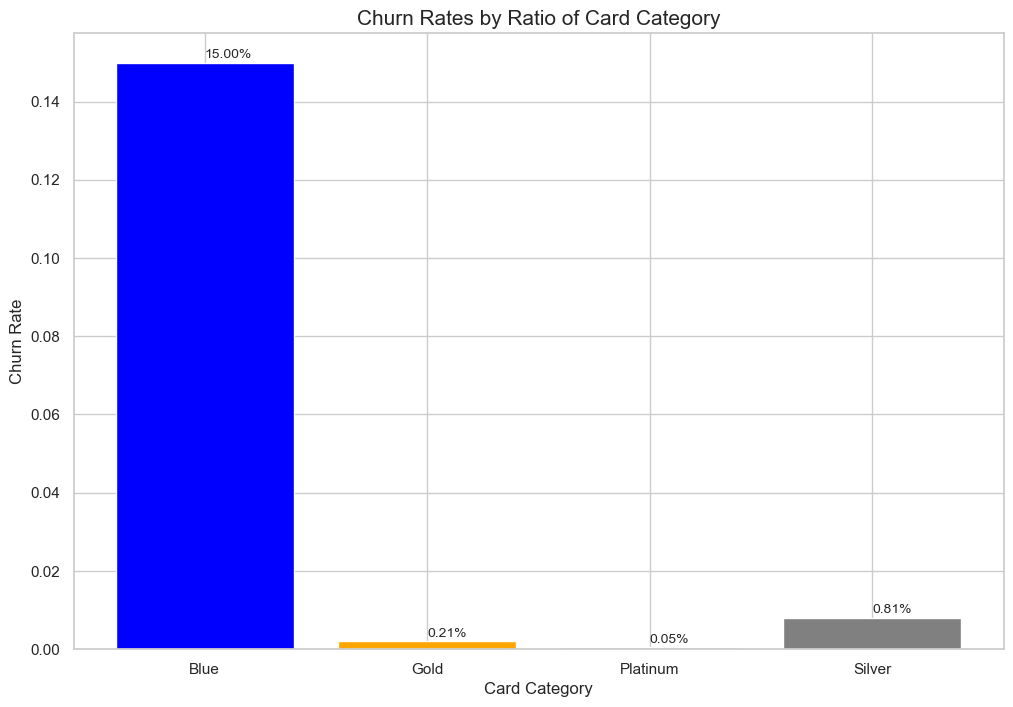

In [423]:
fig, ax = plt.subplots(figsize=(12, 8))

colors = ['blue', 'orange', 'silver', 'grey']

bars = ax.bar(churn_rate_ratio_cc.index, churn_rate_ratio_cc.values, color=colors)
ax.grid(axis='y', linestyle='-')

for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.2f}%'.format(height*100), xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),textcoords="offset points", fontsize=10)
    
plt.xlabel('Card Category', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.title('Churn Rates by Ratio of Card Category', fontsize=15)
plt.show()

In [419]:
# From the graph above , it can be observed that the ratio churn rates are the highest for customers in the blue card category.Therefore , we can conclude that the churn rate is highest for customers in the blue card category.

##### Linear regression for correlation between card category and churn rate

## Conclusion:

In [1]:
# The following conclusions can be drawn based on the dataset analysis and the research question of how demographics such as age and income affect credit card churn rates:
# 1.Churn rates increase with customer age, indicating that older customers are more likely to churn. This implies that credit card companies should prioritise retaining older customers by providing them with incentives and rewards to stay loyal.
# 2.Churn rates differ significantly by marital status, with married and single customers having the highest and Divorced customers having the lowest. To better address their unique needs and concerns, credit card companies should consider tailoring their marketing and retention strategies to specific marital status.
# 3.Churn rates differ slightly by gender as females have a slightly churn rate then male customers.
# 4.Churn rates differ significantly by income categories, with less than $40K customers having the highest and $120k + customers having the lowest. To better address their unique needs and concerns, credit card companies should consider tailoring their marketing and retention strategies to specific income categories
# 5.Churn rates differ significantly by eductaion level , with thhe Doctorate eductaion level having the highest churn rates.Therefore , as the education level increases the churn rate also increases.
# 6.Churn rates differ significantly by card categoires , with blue card category customers having the highest and Platinum  card category customers having the lowest.Therefore , credit card companies should consider tailoring their marketing and retention strategies to specific card categories>
